# 800_RQ1_Analysis 


In [253]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline

In [254]:
np.random.seed(0)

In [255]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [256]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [257]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,https://cdn.sofifa.org/18/players/158023.png,False,False,False,42.00,8.255952,33.0,7.666667
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,https://cdn.sofifa.org/18/players/20801.png,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,https://cdn.sofifa.org/18/players/176580.png,False,False,False,41.25,7.018182,29.0,6.689655
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/18/players/41236.png,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,https://cdn.sofifa.org/18/players/188545.png,False,False,False,40.00,6.050000,28.0,6.785714


## Goalkeepers

In [258]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [259]:
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]

In [260]:
w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [261]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [262]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [263]:
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

In [265]:
neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [266]:
underperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

In [267]:
overperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [268]:
underperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underperforming_average_gk['overall'].values[:,np.newaxis])
underperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underperforming_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [269]:
overperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overperforming_average_gk['overall'].values[:,np.newaxis])
overperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overperforming_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [270]:
underperforming_goalkeepers = pd.concat([underperforming_average_gk ,underperforming_worldclass_gk ],axis=0)

In [271]:
overperforming_goalkeepers = pd.concat([overperforming_average_gk ,overperforming_worldclass_gk ],axis=0)

In [272]:
ag1 = underperforming_average_gk['overall'].values[:,np.newaxis] 
ag2 = underperforming_average_gk['Previous Average Form'].values 
ag3 = overperforming_average_gk['overall'].values[:,np.newaxis] 
ag4 = overperforming_average_gk['Previous Average Form'].values 

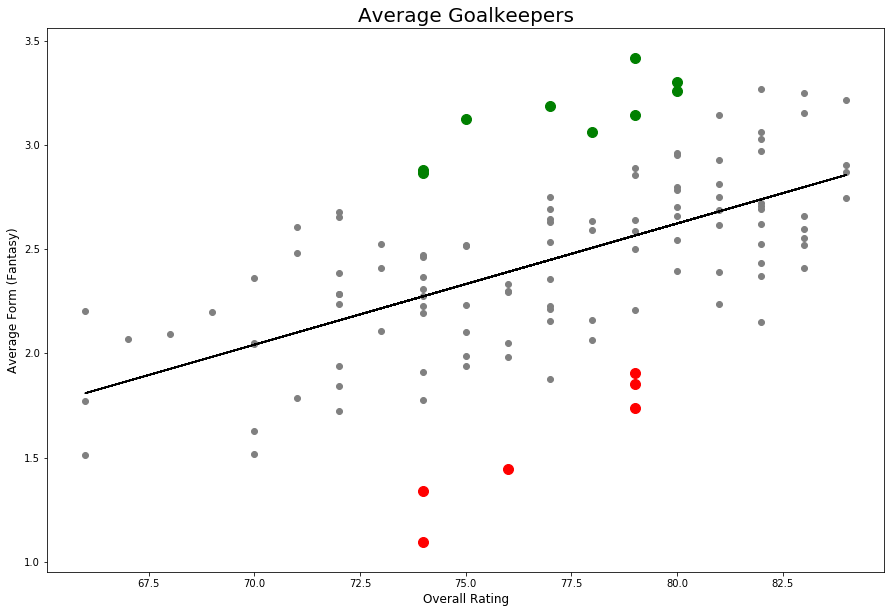

In [273]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ag1, ag2,color='green',s=100) 
plt.scatter(ag3, ag4,color='red',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.title('Average Goalkeepers', fontsize=20)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 

In [274]:
wg1 = underperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg2 = underperforming_worldclass_gk['Previous Average Form'].values 
wg3 = overperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg4 = overperforming_worldclass_gk['Previous Average Form'].values

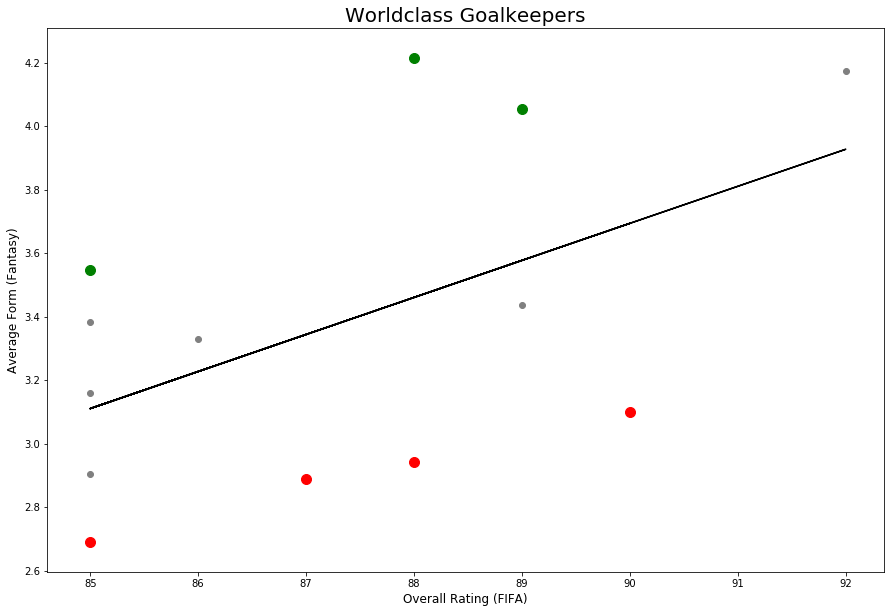

In [275]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wg1, wg2,color='green',s=100) 
plt.scatter(wg3, wg4,color='red',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.title('Worldclass Goalkeepers', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Defenders

In [276]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [277]:
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]

In [278]:
w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [280]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [281]:
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [282]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

In [283]:
neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [284]:
underperforming_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

In [285]:
overperforming_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [286]:
underperforming_average_def['Predicted Form'] = average_defenders_model.predict(underperforming_average_def['overall'].values[:,np.newaxis])
underperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underperforming_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [287]:
overperforming_average_def['Predicted Form'] = average_defenders_model.predict(overperforming_average_def['overall'].values[:,np.newaxis])
overperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overperforming_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:
underperforming_defenders = pd.concat([underperforming_average_def ,underperforming_worldclass_def ],axis=0)

In [289]:
overperforming_defenders = pd.concat([overperforming_average_def ,overperforming_worldclass_def ],axis=0)

In [290]:
ad1 = underperforming_average_def['overall'].values[:,np.newaxis] 
ad2 = underperforming_average_def['Previous Average Form'].values 
ad3 = overperforming_average_def['overall'].values[:,np.newaxis] 
ad4 = overperforming_average_def['Previous Average Form'].values 

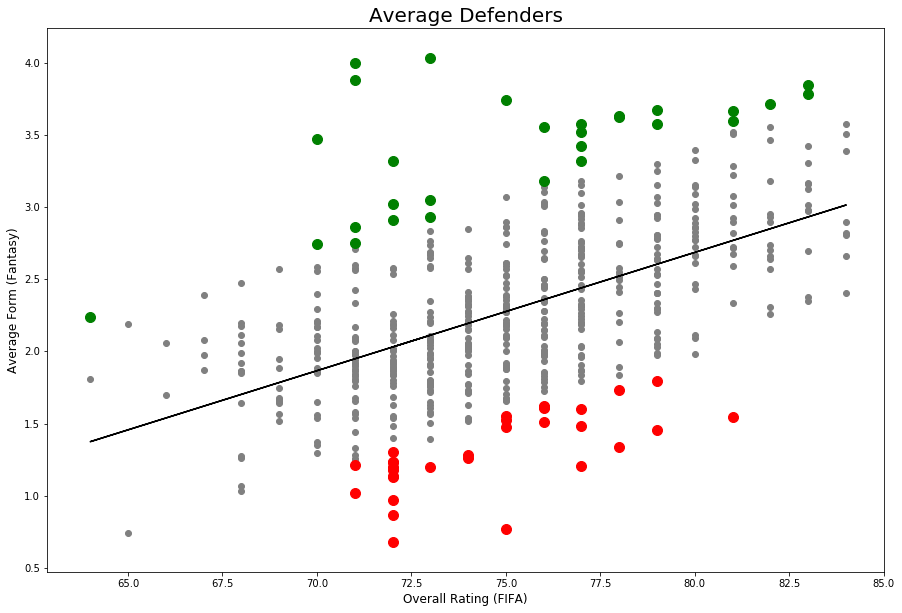

In [291]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ad1, ad2,color='green',s=100) 
plt.scatter(ad3, ad4,color='red',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.title('Average Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

In [292]:
wd1 = underperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd2 = underperforming_worldclass_def['Previous Average Form'].values 
wd3 = overperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd4 = overperforming_worldclass_def['Previous Average Form'].values

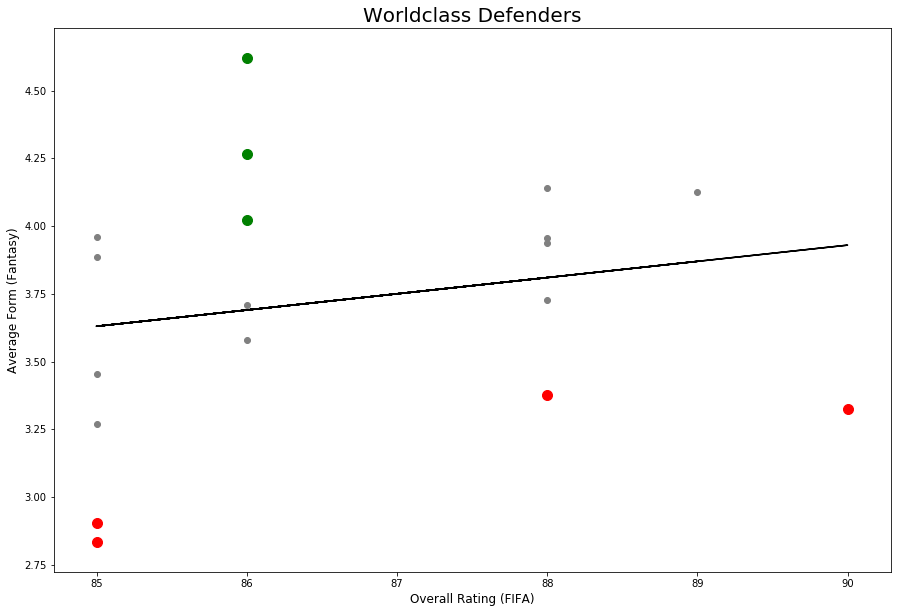

In [293]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wd1, wd2,color='green',s=100) 
plt.scatter(wd3, wd4,color='red',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.title('Worldclass Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Midfielders

In [294]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [295]:
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]

In [296]:
w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [298]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [300]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

In [301]:
neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [302]:
underperforming_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

In [303]:
overperforming_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [304]:
underperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(underperforming_average_mid['overall'].values[:,np.newaxis])
underperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underperforming_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [305]:
overperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(overperforming_average_mid['overall'].values[:,np.newaxis])
overperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overperforming_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [306]:
underperforming_midfielders = pd.concat([underperforming_average_mid ,underperforming_worldclass_mid ],axis=0)

In [307]:
overperforming_midfielders = pd.concat([overperforming_average_mid ,overperforming_worldclass_mid ],axis=0)

In [308]:
am1 = underperforming_average_mid['overall'].values[:,np.newaxis] 
am2 = underperforming_average_mid['Previous Average Form'].values 
am3 = overperforming_average_mid['overall'].values[:,np.newaxis] 
am4 = overperforming_average_mid['Previous Average Form'].values 

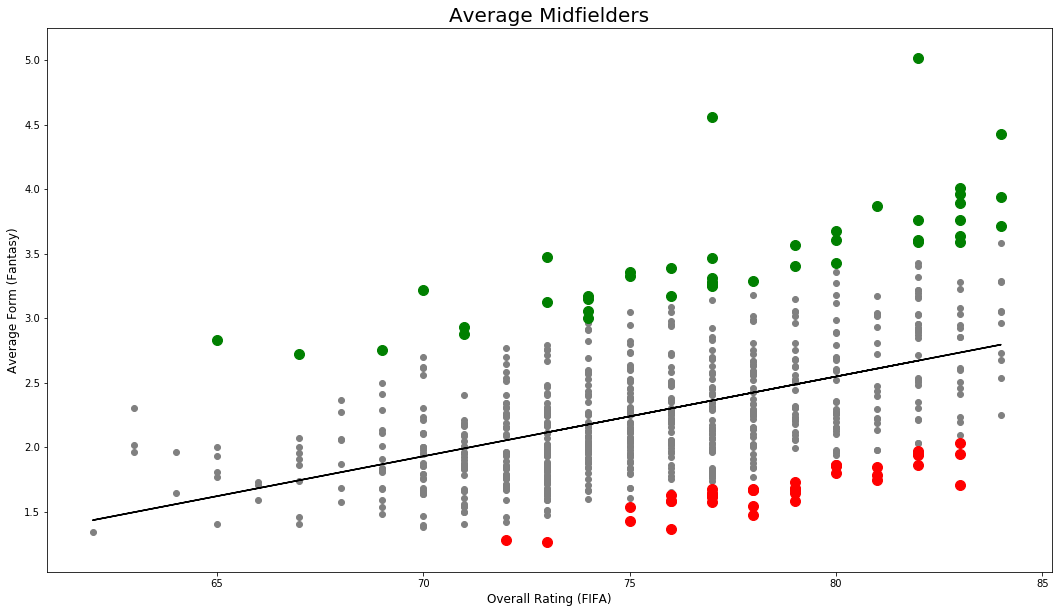

In [309]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(am1, am2,color='green',s=100) 
plt.scatter(am3, am4,color='red',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.title('Average Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 

In [310]:
wm1 = underperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm2 = underperforming_worldclass_mid['Previous Average Form'].values 
wm3 = overperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm4 = overperforming_worldclass_mid['Previous Average Form'].values

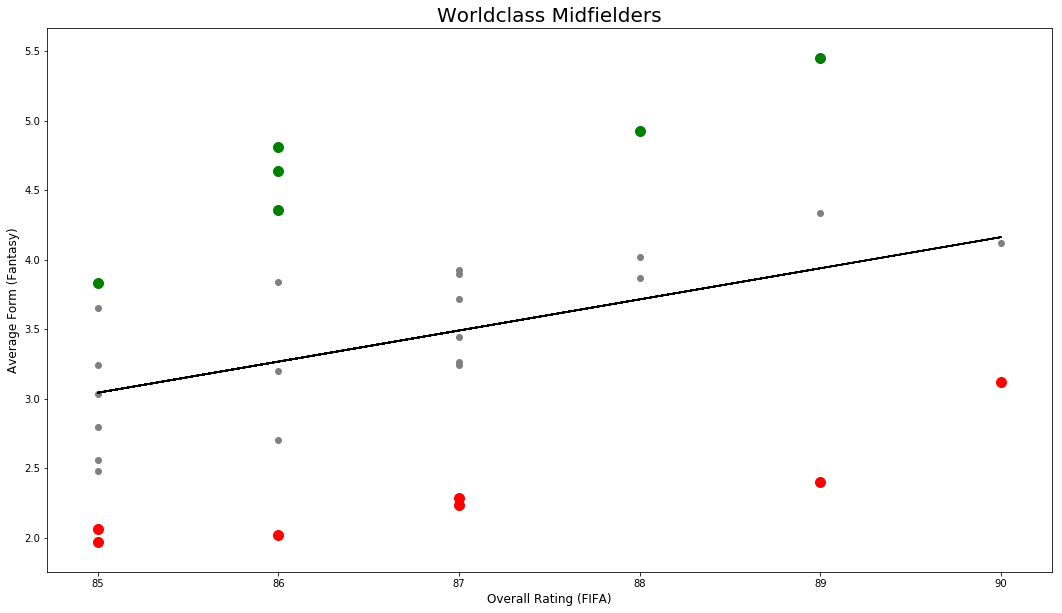

In [311]:
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wm1, wm2,color='green',s=100) 
plt.scatter(wm3, wm4,color='red',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.title('Worldclass Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Forwards

In [312]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [313]:
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]

In [314]:
w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [317]:
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [318]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

In [319]:
neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [320]:
underperforming_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

In [321]:
overperforming_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [322]:
underperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(underperforming_average_fwd['overall'].values[:,np.newaxis])
underperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underperforming_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [323]:
overperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(overperforming_average_fwd['overall'].values[:,np.newaxis])
overperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overperforming_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [324]:
underperforming_forwards = pd.concat([underperforming_average_fwd ,underperforming_worldclass_fwd ],axis=0)

In [325]:
overperforming_forwards = pd.concat([overperforming_average_fwd ,overperforming_worldclass_fwd ],axis=0)

In [326]:
af1 = underperforming_average_fwd['overall'].values[:,np.newaxis] 
af2 = underperforming_average_fwd['Previous Average Form'].values 
af3 = overperforming_average_fwd['overall'].values[:,np.newaxis] 
af4 = overperforming_average_fwd['Previous Average Form'].values 

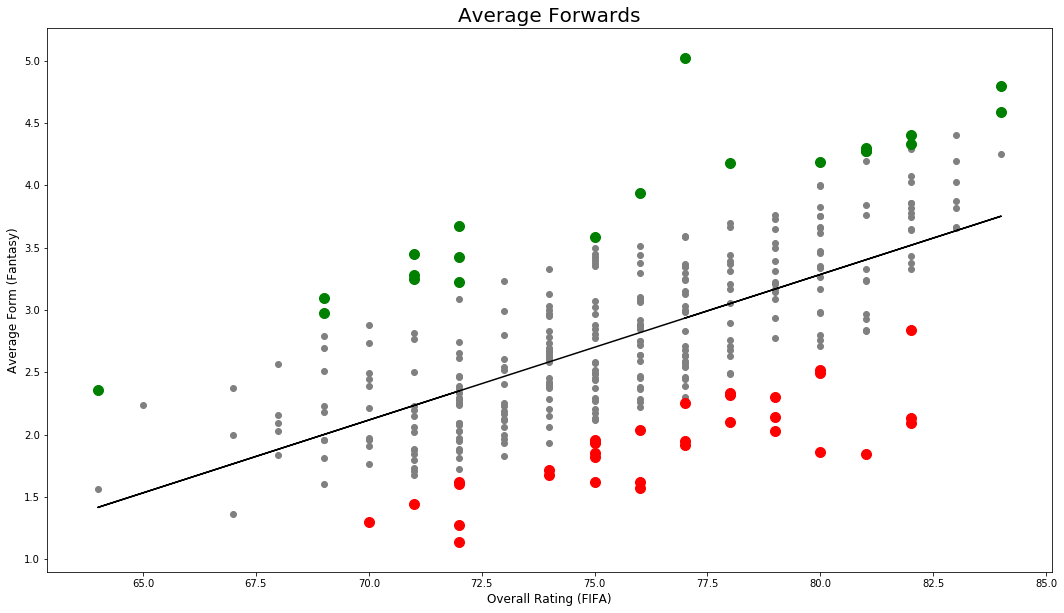

In [327]:
plt.figure(figsize=(18,10))
plt.scatter(w, z,color='grey') 
plt.scatter(af1, af2,color='green',s=100) 
plt.scatter(af3, af4,color='red',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('Average Forwards', fontsize=20)
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

In [328]:
wf1 = underperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf2 = underperforming_worldclass_fwd['Previous Average Form'].values 
wf3 = overperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf4 = overperforming_worldclass_fwd['Previous Average Form'].values

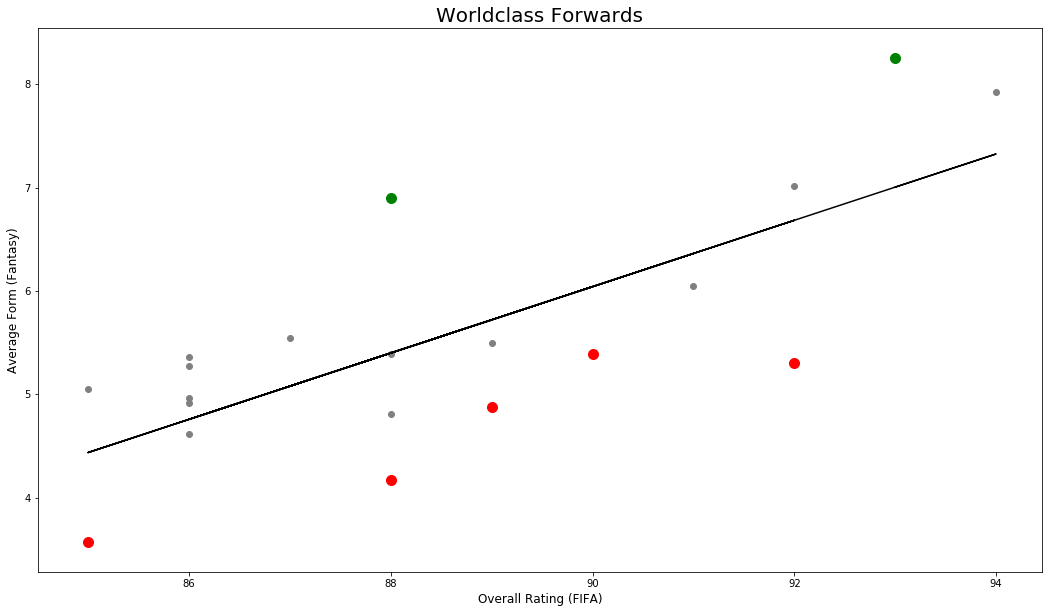

In [329]:
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wf1, wf2,color='green',s=100) 
plt.scatter(wf3, wf4,color='red',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('Worldclass Forwards', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()

## Underrated Players

In [330]:
underrated_players = pd.concat([underperforming_goalkeepers,underperforming_defenders,underperforming_midfielders,underperforming_forwards], axis=0).reset_index().drop('index',1)

In [331]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]

In [332]:
underrated_players['FIFA Rating Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form'])
underrated_players['Previous Form Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Previous Average Form'])
underrated_players['Difference'] = abs(underrated_players['FIFA Rating Distance'] - underrated_players['Previous Form Distance'])

In [333]:
underrated_players.loc[underrated_players['FIFA Rating Distance']<underrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
underrated_players.loc[underrated_players['FIFA Rating Distance']>underrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
underrated_players.loc[underrated_players['FIFA Rating Distance'] == underrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [334]:
x = underrated_players['Verdict'].value_counts()

Text(0,0.5,'')

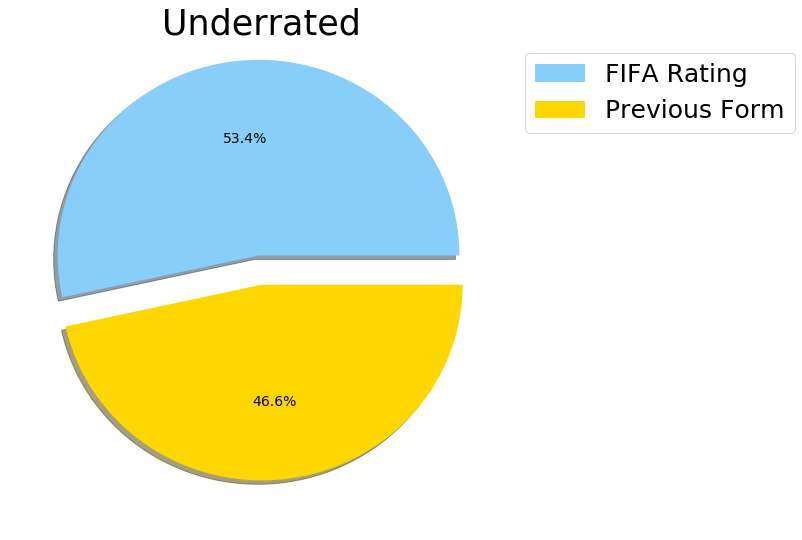

In [335]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightskyblue','gold'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Underrated',fontsize=35,color='Black')
plt.ylabel('')

In [336]:
underrated_players_result = underrated_players[underrated_players['Verdict']=='Previous Form']
underrated_players_result = underrated_players_result.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [337]:
underrated_players_result.head(10)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/18/players/188350.png,True,False,...,31.000000,4.806452,9.0,5.111111,1.540520,3.265931,1.845180,0.304659,1.540520,Previous Form
1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/18/players/189446.png,False,False,...,21.000000,3.476190,19.0,3.473684,1.359537,2.116653,1.357031,0.002506,1.354525,Previous Form
2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/18/players/201942.png,False,False,...,41.250000,3.890909,35.0,4.571429,1.156426,2.734483,1.836946,0.680519,1.156426,Previous Form
3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/18/players/208722.png,False,False,...,31.333333,3.936170,27.0,4.370370,1.139904,2.796266,1.574105,0.434200,1.139904,Previous Form
4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/18/players/220814.png,False,False,...,8.666667,3.576923,25.0,4.400000,1.136721,2.440202,1.959798,0.823077,1.136721,Previous Form
5,Nabil Fekir,Midfielder,Olympique Lyonnais,French Ligue 1,23,France,82,https://cdn.sofifa.org/18/players/216594.png,False,False,...,21.250000,3.764706,27.0,5.481481,1.092006,2.672700,2.808782,1.716776,1.092006,Previous Form
6,James Rodriguez,Midfielder,FC Bayern Munich,German Bundesliga,25,Colombia,86,https://cdn.sofifa.org/18/players/198710.png,False,False,...,28.000000,4.357143,21.0,4.428571,1.091212,3.265931,1.162640,0.071429,1.091212,Previous Form
7,Dele Alli,Midfielder,Tottenham Hotspur,English Premier League,21,England,84,https://cdn.sofifa.org/18/players/211117.png,False,False,...,35.000000,4.428571,32.0,4.156250,1.632306,2.796266,1.359984,0.272321,1.087663,Previous Form
8,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/18/players/201399.png,False,False,...,38.750000,4.793548,31.0,6.483871,1.041475,3.752074,2.731797,1.690323,1.041475,Previous Form
9,Anthony Martial,Midfielder,Manchester United,English Premier League,21,France,82,https://cdn.sofifa.org/18/players/211300.png,False,False,...,29.500000,3.593220,29.0,3.620690,0.920520,2.672700,0.947990,0.027469,0.920520,Previous Form


## Overerrated Players

In [338]:
overrated_players = pd.concat([overperforming_goalkeepers,overperforming_defenders,overperforming_midfielders,overperforming_forwards], axis=0).reset_index().drop('index',1)

In [339]:
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [340]:
overrated_players['FIFA Rating Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form'])
overrated_players['Previous Form Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Previous Average Form'])
overrated_players['Difference'] = abs(overrated_players['FIFA Rating Distance'] - overrated_players['Previous Form Distance'])

In [341]:
overrated_players.loc[overrated_players['FIFA Rating Distance']<overrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
overrated_players.loc[overrated_players['FIFA Rating Distance']>overrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
overrated_players.loc[overrated_players['FIFA Rating Distance'] == overrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [342]:
y = overrated_players['Verdict'].value_counts()

Text(0,0.5,'')

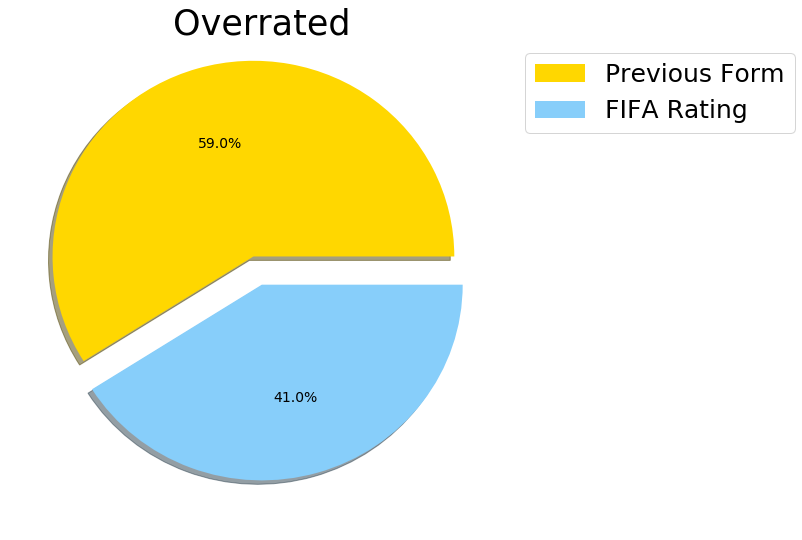

In [343]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['gold','lightskyblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overrated',fontsize=35,color='Black')
plt.ylabel('')

In [344]:
overrated_players_result = overrated_players[overrated_players['Verdict']=='Previous Form']
overrated_players_result = overrated_players_result.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [345]:
overrated_players_result.head(10).to_clipboard()

## Reasons for players being over/underrated 

In [346]:
underrated_goalkeepers = underrated_players_result[underrated_players_result['Position'] == 'Goalkeeper']
underrated_defenders = underrated_players_result[underrated_players_result['Position'] == 'Defender']
underrated_midfielders = underrated_players_result[underrated_players_result['Position'] == 'Midfielder']
underrated_forwards = underrated_players_result[underrated_players_result['Position'] == 'Forward']

In [347]:
overrated_goalkeepers = overrated_players_result[overrated_players_result['Position'] == 'Goalkeeper']
overrated_defenders = overrated_players_result[overrated_players_result['Position'] == 'Defender']
overrated_midfielders = overrated_players_result[overrated_players_result['Position'] == 'Midfielder']
overrated_forwards = overrated_players_result[overrated_players_result['Position'] == 'Forward']

#### 1. Age

In [348]:
age = pd.DataFrame(columns = ['Goalkeepers','Defenders','Midfielders','Forwards'])
age.set_value('All','Goalkeepers',RQ1_Goalkeepers.mean()['age'])
age.set_value('Overrated ','Goalkeepers',overrated_goalkeepers.mean()['age'])
age.set_value('Underrated','Goalkeepers',underrated_goalkeepers.mean()['age'])
age.set_value('All','Defenders',RQ1_Defenders.mean()['age'])
age.set_value('Overrated ','Defenders',overrated_defenders.mean()['age'])
age.set_value('Underrated','Defenders',underrated_defenders.mean()['age'])
age.set_value('All','Midfielders',RQ1_Midfielders.mean()['age'])
age.set_value('Overrated ','Midfielders',overrated_midfielders.mean()['age'])
age.set_value('Underrated','Midfielders',underrated_midfielders.mean()['age'])
age.set_value('All','Forwards',RQ1_Forwards.mean()['age'])
age.set_value('Overrated ','Forwards',overrated_forwards.mean()['age'])
age.set_value('Underrated','Forwards',underrated_forwards.mean()['age'])

,Goalkeepers,Defenders,Midfielders,Forwards
All,30.0977,28.3292,27.4818,27.3324
Overrated,NaN,26.75,25.88,25.3846
Underrated,29,26,25.8824,28


#### 2. Apps

In [349]:
apps = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
apps.set_value('Average Apps/Season','All Players',RQ1.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Underrated Players',underrated_players_result.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Overrated Players',overrated_players_result.mean()['Average Apps/Season'])
apps.set_value('Apps This Season','All Players',RQ1.mean()['Apps This Season'])
apps.set_value('Apps This Season','Underrated Players',underrated_players_result.mean()['Apps This Season'])
apps.set_value('Apps This Season','Overrated Players',overrated_players_result.mean()['Apps This Season'])

,All Players,Underrated Players,Overrated Players
Average Apps/Season,29.0289,28.6789,30.6105
Apps This Season,14.2808,25.8235,21.7174


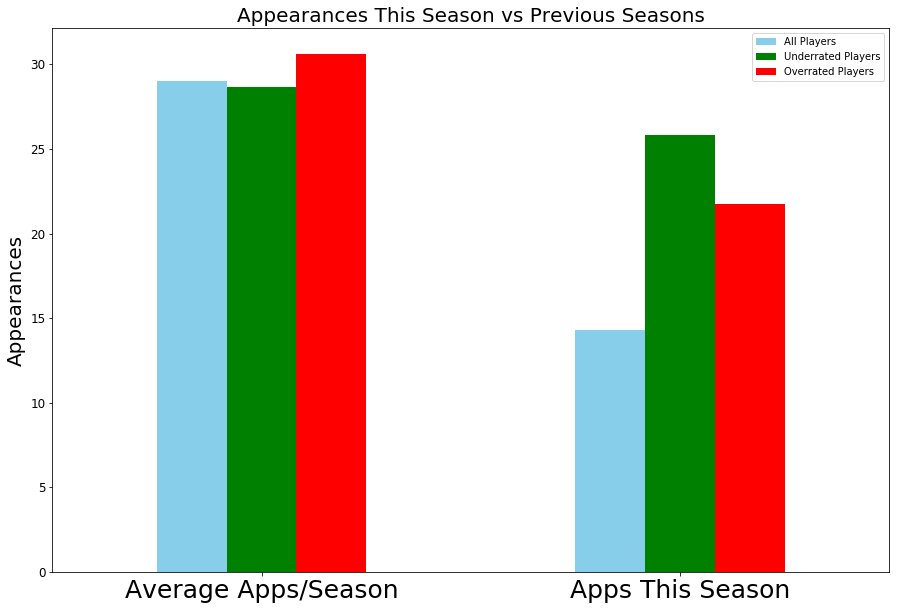

In [350]:
colors = ['skyblue','green','r']
ax = apps.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12,color=colors)
ax.set_title("Appearances This Season vs Previous Seasons",size=20)
ax.set_xlabel("")
ax.set_ylabel("Appearances", fontsize=20)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=25)
plt.show()

#### 3. Position

In [351]:
position_underrated = underrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underrated

Position
Midfielder    33
Defender      20
Forward       11
Goalkeeper     9
Name: Players, dtype: int64

In [352]:
position_underrated_result = underrated_players_result.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underrated_result = position_underrated_result.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_underrated_result

Position
Midfielder    17
Defender       9
Forward        3
Goalkeeper     5
Name: Players, dtype: int64

In [353]:
underated_difference = position_underrated - position_underrated_result
underated_difference

Position
Midfielder    16
Defender      11
Forward        8
Goalkeeper     4
Name: Players, dtype: int64

In [354]:
underated_percentage = (position_underrated_result/position_underrated)*100
underated_percentage.to_frame()

,Players
Position,
Midfielder,51.515152
Defender,45.000000
Forward,27.272727
Goalkeeper,55.555556


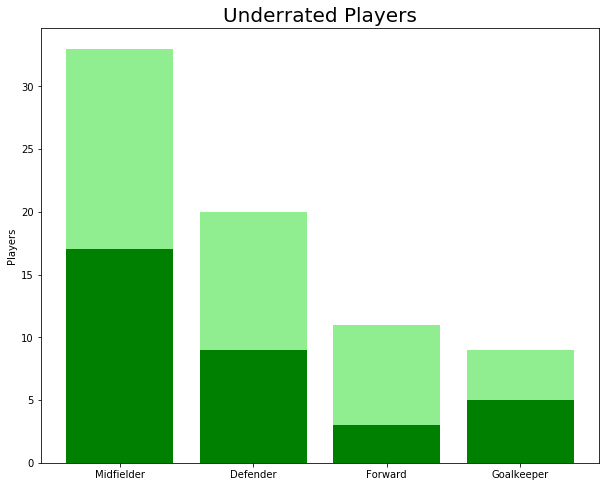

In [355]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_underrated_result, color = 'g')
plt.bar(X, underated_difference, color = 'lightgreen', bottom = position_underrated_result)
plt.title('Underrated Players', fontsize=20)
plt.xticks(labels_order, positions_labels)
plt.ylabel('Players')

plt.show()

In [356]:
position_overrated = overrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overrated

Position
Midfielder    32
Defender      21
Forward       19
Goalkeeper     6
Name: Players, dtype: int64

In [357]:
position_overrated_result = overrated_players_result.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overrated_result = position_overrated_result.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_overrated_result

Position
Midfielder    25.0
Defender       8.0
Forward       13.0
Goalkeeper     NaN
Name: Players, dtype: float64

In [358]:
position_overrated_result = np.where(np.isnan(position_overrated_result), 0, position_overrated_result)

In [359]:
overrated_difference = position_overrated - position_overrated_result
overrated_difference

Position
Midfielder     7.0
Defender      13.0
Forward        6.0
Goalkeeper     6.0
Name: Players, dtype: float64

In [360]:
overated_percentage = (position_overrated_result/position_overrated)*100
overated_percentage.to_frame()

,Players
Position,
Midfielder,78.125000
Defender,38.095238
Forward,68.421053
Goalkeeper,0.000000


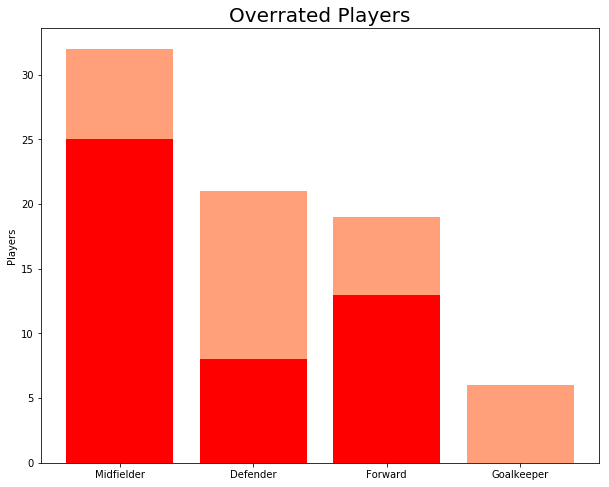

In [361]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_overrated_result, color = 'r')
plt.bar(X, overrated_difference, color = 'lightsalmon', bottom = position_overrated_result)
plt.title('Overrated Players', fontsize=20)
plt.xticks(labels_order, positions_labels)
plt.ylabel('Players')

plt.show()

#### 4. Injury Prone

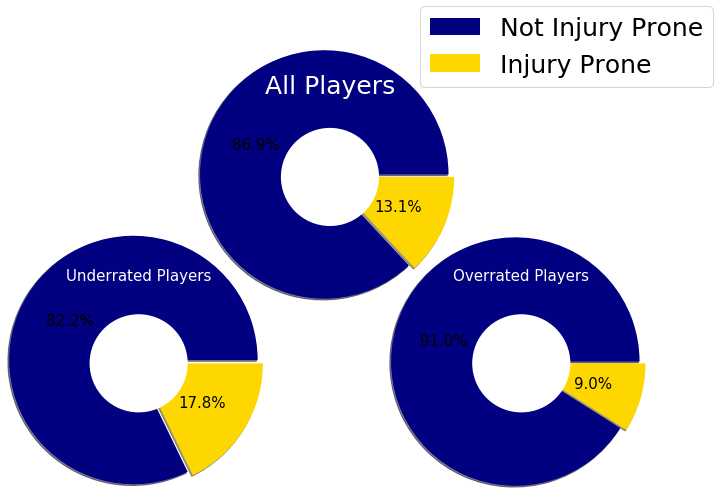

In [378]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['injury_prone_trait'].plot(figsize=(20,20))

plt.subplot(the_grid[4,2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['navy','gold'],explode=explode2)
plt.gca().set_title('Underrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3,3], aspect=1)
explode2 = (0.1, 0)
plt.pie(RQ1['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['navy','gold'],explode=explode2)
plt.gca().set_title('All Players',color='white',fontsize=25)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=['Not Injury Prone','Injury Prone'])
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['navy','gold'],explode=explode2)
plt.gca().set_title('Overrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#### 5. Homegrown

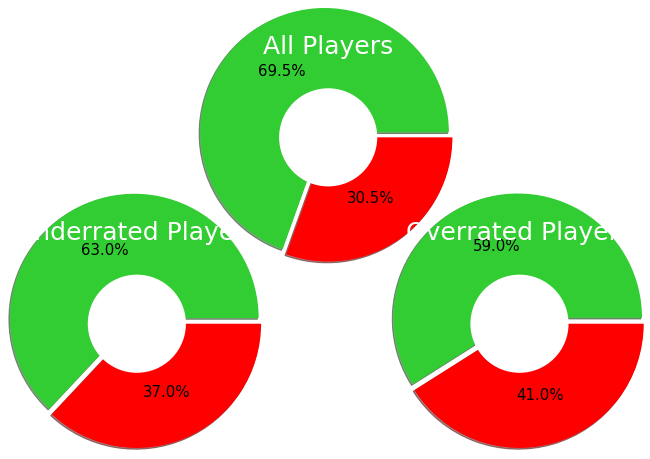

In [363]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['Homegrown'].plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Underrated Players',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 3], aspect=1)
explode2 = (0.1, 0)
plt.pie(RQ1['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('All Players',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['Homegrown'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('Overrated Players',color='white',fontsize=25)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Under/Overrated XI's


In [364]:
underrated_goalkeepers = underrated_players[underrated_players['Position']=='Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position']=='Defender']
underrated_midfielders = underrated_players[underrated_players['Position']=='Midfielder']
underrated_forwards = underrated_players[underrated_players['Position']=='Forward']

In [365]:
underrated_goalkeepers = underrated_goalkeepers.sort_values('Difference',ascending=False)
underrated_goalkeeper = underrated_goalkeepers.head(1)

underrated_defenders = underrated_defenders.sort_values('Difference',ascending=False)
underrated_defender = underrated_defenders.head(4)


underrated_midfielders = underrated_midfielders.sort_values('Difference',ascending=False)
underrated_midfielder = underrated_midfielders.head(4)


underrated_forwards = underrated_forwards.sort_values('Difference',ascending=False)
underrated_forward = underrated_forwards.head(2)

underrated_XI= pd.concat([underrated_goalkeeper,underrated_defender,underrated_midfielder,underrated_forward])

In [366]:
underrated_XI['photo'] = underrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
underrated_XI = underrated_XI.reset_index()
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].round(2)
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].astype(str)
Squad_Rating = underrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [367]:
underrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,9,Jan Oblak,Goalkeeper,Atletico Madrid,Spanish Primera Division,24,Slovenia,88,https://cdn.sofifa.org/1x/18/players/200389.png,False,...,26.33,4.22,34.0,4.59,0.75,3.46,1.13,0.37,0.75,Previous Form
1,26,Gregory van der Wiel,Defender,Cagliari,Italian Serie A,29,Netherlands,76,https://cdn.sofifa.org/1x/18/players/183937.png,False,...,30.00,3.56,5.0,1.00,1.20,2.36,1.36,2.56,1.20,FIFA Rating
2,24,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/1x/18/players/220814.png,False,...,8.67,3.58,25.0,4.40,1.14,2.44,1.96,0.82,1.14,Previous Form
3,19,Patrice Evra,Defender,Olympique de Marseille,French Ligue 1,36,France,79,https://cdn.sofifa.org/1x/18/players/52091.png,False,...,32.75,3.67,8.0,1.88,1.07,2.6,0.73,1.80,1.07,FIFA Rating
4,20,Dante,Defender,OGC Nice,French Ligue 1,33,Brazil,81,https://cdn.sofifa.org/1x/18/players/158625.png,False,...,35.50,3.66,30.0,1.97,0.89,2.77,0.80,1.70,0.89,FIFA Rating
5,88,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/1x/18/players/188350.png,True,...,31.00,4.81,9.0,5.11,1.54,3.27,1.85,0.30,1.54,Previous Form
6,89,Franck Ribery,Midfielder,FC Bayern Munich,German Bundesliga,34,France,86,https://cdn.sofifa.org/1x/18/players/156616.png,True,...,24.75,4.64,19.0,3.05,1.37,3.27,0.21,1.58,1.37,FIFA Rating
7,62,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/1x/18/players/189446.png,False,...,21.00,3.48,19.0,3.47,1.36,2.12,1.36,0.00,1.35,Previous Form
8,87,Arjen Robben,Midfielder,FC Bayern Munich,German Bundesliga,33,Netherlands,88,https://cdn.sofifa.org/1x/18/players/9014.png,True,...,26.75,4.93,21.0,3.71,1.21,3.71,0.00,1.21,1.21,FIFA Rating
9,114,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/1x/18/players/41236.png,False,...,37.50,6.90,5.0,1.20,1.50,5.4,4.20,5.70,1.50,FIFA Rating


In [368]:
JoinedUnderratedImages = underrated_XI['photo'].as_matrix() 
GK1 = mpimg.imread(JoinedUnderratedImages [0]) 
DF1 = mpimg.imread(JoinedUnderratedImages [1]) 
DF2 = mpimg.imread(JoinedUnderratedImages [2]) 
DF3 = mpimg.imread(JoinedUnderratedImages [3]) 
DF4 = mpimg.imread(JoinedUnderratedImages [4]) 
MD1 = mpimg.imread(JoinedUnderratedImages [5]) 
MD2 = mpimg.imread(JoinedUnderratedImages [6]) 
MD3 = mpimg.imread(JoinedUnderratedImages [7]) 
MD4 = mpimg.imread(JoinedUnderratedImages [8]) 
FW1 = mpimg.imread(JoinedUnderratedImages [9]) 
FW2 = mpimg.imread(JoinedUnderratedImages [10])

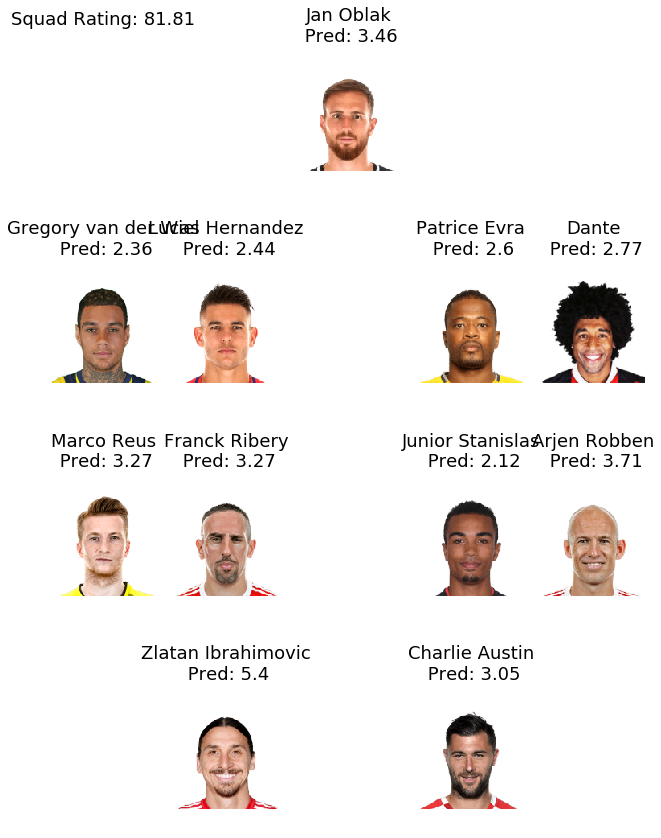

In [369]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(underrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[0] + '\n' ) 
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(underrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[1] + '\n' ) 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(underrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[2] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(underrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(underrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[4] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(underrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(underrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(underrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(underrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(underrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(underrated_XI['Players'].loc[10] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[10] + '\n') 
axarr[3,5].axis('off')


f.savefig('../../data/analysis/Underrated_XI.png')


In [370]:
overrated_goalkeepers = overrated_players[overrated_players['Position']=='Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position']=='Defender']
overrated_midfielders = overrated_players[overrated_players['Position']=='Midfielder']
overrated_forwards = overrated_players[overrated_players['Position']=='Forward']

In [371]:
overrated_goalkeepers = overrated_goalkeepers.sort_values('Difference',ascending=False)
overrated_goalkeeper = overrated_goalkeepers.head(1)

overrated_defenders = overrated_defenders.sort_values('Difference',ascending=False)
overrated_defender = overrated_defenders.head(4)


overrated_midfielders = overrated_midfielders.sort_values('Difference',ascending=False)
overrated_midfielder = overrated_midfielders.head(4)


overrated_forwards = overrated_forwards.sort_values('Difference',ascending=False)
overrated_forward = overrated_forwards.head(2)

overrated_XI= pd.concat([overrated_goalkeeper,overrated_defender,overrated_midfielder,overrated_forward])

In [372]:
overrated_XI['photo'] = overrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
overrated_XI = overrated_XI.reset_index()
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].round(2)
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].astype(str)
Squad_Rating = overrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [373]:
overrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,2,Ron-Robert Zieler,Goalkeeper,VfB Stuttgart,German Bundesliga,28,Germany,79,https://cdn.sofifa.org/1x/18/players/186148.png,False,...,36.25,1.74,32.0,3.19,-0.83,2.56,0.62,1.45,0.83,FIFA Rating
1,30,Oscar Duarte,Defender,RCD Espanyol,Spanish Primera Division,28,Costa Rica,77,https://cdn.sofifa.org/1x/18/players/212772.png,False,...,14.50,1.21,11.0,2.73,-1.23,2.44,0.29,1.52,1.23,FIFA Rating
2,38,Luca Ceppitelli,Defender,Cagliari,Italian Serie A,27,Italy,72,https://cdn.sofifa.org/1x/18/players/205553.png,False,...,22.50,0.87,24.0,2.17,-1.16,2.03,0.14,1.30,1.16,FIFA Rating
3,23,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,https://cdn.sofifa.org/1x/18/players/223033.png,False,...,28.00,1.34,21.0,1.43,-1.18,2.52,1.09,0.09,1.00,Previous Form
4,40,Marco Capuano,Defender,Cagliari,Italian Serie A,25,Italy,72,https://cdn.sofifa.org/1x/18/players/201529.png,False,...,26.50,0.68,22.0,1.82,-1.35,2.03,0.21,1.14,0.93,FIFA Rating
5,85,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24,Italy,87,https://cdn.sofifa.org/1x/18/players/199556.png,False,...,33.50,2.23,22.0,1.91,-1.26,3.49,1.58,0.32,1.26,Previous Form
6,84,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,https://cdn.sofifa.org/1x/18/players/215914.png,False,...,36.33,2.28,31.0,2.16,-1.21,3.49,1.33,0.12,1.21,Previous Form
7,83,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,https://cdn.sofifa.org/1x/18/players/177003.png,False,...,35.00,2.40,23.0,2.61,-1.54,3.94,1.33,0.21,1.12,Previous Form
8,88,Casemiro,Midfielder,Real Madrid CF,Spanish Primera Division,25,Brazil,85,https://cdn.sofifa.org/1x/18/players/200145.png,False,...,20.33,1.97,26.0,3.04,-1.07,3.04,0.00,1.07,1.07,FIFA Rating
9,123,Neymar,Forward,Paris Saint-Germain,French Ligue 1,25,Brazil,92,https://cdn.sofifa.org/1x/18/players/190871.png,False,...,31.00,5.31,20.0,8.55,-1.38,6.68,1.87,3.24,1.38,FIFA Rating


In [374]:
JoinedOverratedImages = overrated_XI['photo'].as_matrix()

QM = mpimg.imread('../../data/raw/blankface.png')
DF1 = mpimg.imread(JoinedOverratedImages [0])
DF2 = mpimg.imread(JoinedOverratedImages [1])
DF3 = mpimg.imread(JoinedOverratedImages [2])
DF4 = mpimg.imread(JoinedOverratedImages [3])
MD1 = mpimg.imread(JoinedOverratedImages [4])
MD2 = mpimg.imread(JoinedOverratedImages [5])
MD3 = mpimg.imread(JoinedOverratedImages [6])
MD4 = mpimg.imread(JoinedOverratedImages [7])
FW1 = mpimg.imread(JoinedOverratedImages [8])
FW2 = mpimg.imread(JoinedOverratedImages [9])

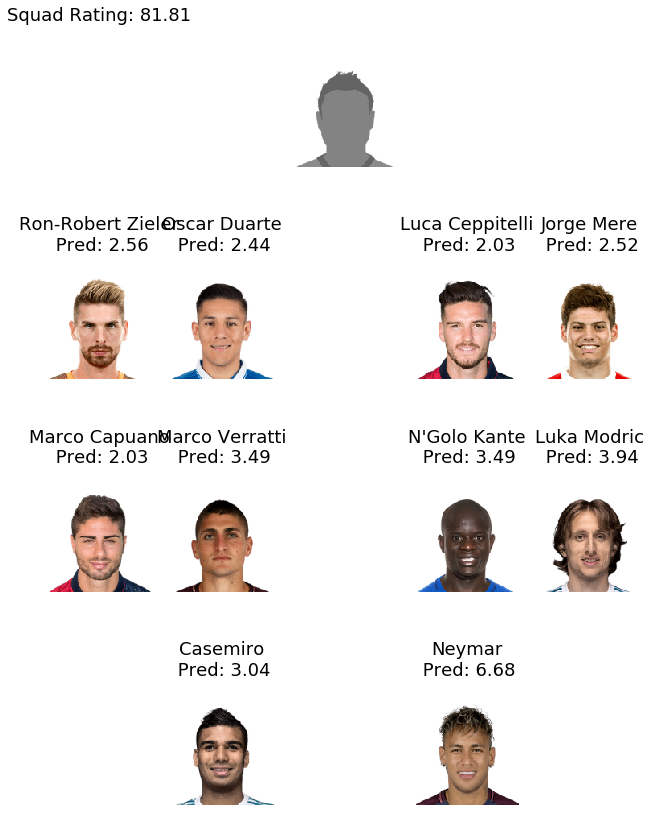

In [375]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()

axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(QM)
axarr[0,4].axis('off')

axarr[1,2].imshow(DF1)
axarr[1,2].set_title(overrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(overrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[1] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(overrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[2] + '\n') 

axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(overrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(overrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(overrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(overrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(overrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(overrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(overrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[9] + '\n' ) 
axarr[3,5].axis('off')



f.savefig('../../data/analysis/Overrated_XI.png')